In [2]:
# Import necessary utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# Import Dow Jones Industrial Average Dataset beginning on January 1st, 2020 found here:
# https://finance.yahoo.com/quote/%5EDJI/history?period1=1577836800&period2=1584403200&interval=1d&filter=history&frequency=1d

DJI_DATASET = r"./Data/^DJI.csv"
disp_data = pd.read_csv(DJI_DATASET)
disp_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000
1,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000
2,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000
3,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000
4,2020-01-08,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,291750000
5,2020-01-09,28851.970703,28988.009766,28844.310547,28956.900391,28956.900391,275060000
6,2020-01-10,28977.519531,29009.070313,28789.099609,28823.769531,28823.769531,237830000
7,2020-01-13,28869.009766,28909.910156,28819.429688,28907.050781,28907.050781,249830000
8,2020-01-14,28895.500000,29054.160156,28872.269531,28939.669922,28939.669922,287440000
9,2020-01-15,28901.800781,29127.589844,28897.349609,29030.220703,29030.220703,260270000


In [4]:
# Calculate Average Change between opening and closing price per day

disp_data["Average"] = (disp_data["Open"] + disp_data["Close"]) / 2


# Convert dates to datetime format that matches COVID-19 data

disp_data["Date"] = pd.to_datetime(disp_data["Date"], errors = 'ignore', yearfirst = True)

# Drop Unnecessary columns
dji_date_data = disp_data.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Adj Close"])

# Isolate to only January 22nd (only contains weekdays)
dji_date_data = dji_date_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12])
dji_date_data = dji_date_data.reset_index()
dji_date_data = dji_date_data.drop(columns = ["index"])

# Check results
dji_date_data

,Date,Average
0,2020-01-22,29224.950195
1,2020-01-23,29135.554688
2,2020-01-24,29110.060547
3,2020-01-27,28539.145507
4,2020-01-28,28658.564453
5,2020-01-29,28777.489258
6,2020-01-30,28749.799804
7,2020-01-31,28534.534180
8,2020-02-03,28359.730469
9,2020-02-04,28752.185546


In [5]:
# Import Italy Dow Jones Titans 30 Index found here: 
# https://us.spindices.com/indices/equity/dow-jones-italy-titans-30-index-usd

ITALY_DATASET = r"C:\Users\William\Documents\Github\Coronadex\Data\italytitansindex.csv"
italy_data = pd.read_csv(ITALY_DATASET)
italy_data = italy_data.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"]).dropna()
italy_data
# italy_data = italy_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,33,54]).reset_index().drop(columns = ["index"])
# italy_data = italy_data.rename(columns = {"Effective date " : "Date"})
# italy_data["Date"] = pd.to_datetime(italy_data["Date"], errors = 'ignore', yearfirst = True)
# italy_data

,Date,Titans 30 Price (USD)
0,1/22/2020,1725.65
1,1/23/2020,1719.94
2,1/24/2020,1734.47
3,1/27/2020,1691.01
4,1/28/2020,1732.68
5,1/29/2020,1741.31
6,1/30/2020,1716.91
7,1/31/2020,1685.17
8,2/3/2020,1696.37
9,2/4/2020,1723.13


In [6]:
# Import COVID-19 dataset found here: https://github.com/CSSEGISandData/COVID-19/blob/
# master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

COVID_DATASET = r"C:\Users\William\Documents\Github\Coronadex\Data\time_series_19-covid-Confirmed.csv"
cov_data = pd.read_csv(COVID_DATASET)
cov_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
459,NaN,Tanzania,-6.3690,34.8888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [59]:
countries = cov_data.sort_values('Country/Region')
countries = countries.reset_index()
countries = countries.drop(columns = ["Lat", "Long", "Province/State", "index"])
# countries["Current Total"] = countries.drop(columns = ["Country/Region"]).sum(axis=1)
# countries = countries[["Current Total", "Country/Region"]].sort_values("Country/Region")
countries

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,4,4,5,7,7,7,11,16,21
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,2,10,12,23,33,38,42,51
2,Algeria,0,0,0,0,0,0,0,0,0,...,17,19,20,20,20,24,26,37,48,54
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Uruguay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,8
459,Uzbekistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
460,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,10,17
461,Vietnam,0,2,2,2,2,2,2,2,2,...,18,30,30,31,38,39,47,53,56,61


In [8]:
# Select data for US region and drop unwanted variables
cov_US = cov_data.loc[cov_data['Country/Region'] == "US"]
cov_US = cov_US.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_US = cov_US.sum(axis = 0, skipna = True)
sum_US = pd.DataFrame(sum_US)
sum_US = sum_US.reset_index()
sum_US = sum_US.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_US["Date"] = pd.to_datetime(sum_US["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_US_final = sum_US.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_US_final = sum_US_final.reset_index()
sum_US_final = sum_US_final.drop(columns = {"index"})
# Check results
sum_US_final

,Date,National Confirmed Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-27,5
4,2020-01-28,5
5,2020-01-29,5
6,2020-01-30,5
7,2020-01-31,7
8,2020-02-03,11
9,2020-02-04,11


In [9]:
cov_IT = cov_data.loc[cov_data['Country/Region'] == "Italy"]
cov_IT = cov_IT.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_IT = cov_IT.sum(axis = 0, skipna = True)
sum_IT = pd.DataFrame(sum_IT)
sum_IT = sum_IT.reset_index()
sum_IT = sum_IT.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_IT["Date"] = pd.to_datetime(sum_IT["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_IT_final = sum_IT.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_IT_final = sum_IT_final.reset_index()
sum_IT_final = sum_IT_final.drop(columns = {"index"})
# Check results
sum_IT_final

,Date,National Confirmed Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-27,0
4,2020-01-28,0
5,2020-01-29,0
6,2020-01-30,0
7,2020-01-31,2
8,2020-02-03,2
9,2020-02-04,2


In [10]:
# Isolate china from COVID-19 data
cov_China = cov_data.loc[cov_data['Country/Region'] == "China"]
cov_China = cov_China.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_China = cov_China.sum(axis = 0, skipna = True)
sum_China = pd.DataFrame(sum_China)
sum_China = sum_China.reset_index()
sum_China = sum_China.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})
sum_China

,Date,National Confirmed Cases
0,1/22/20,548
1,1/23/20,643
2,1/24/20,920
3,1/25/20,1406
4,1/26/20,2075
5,1/27/20,2877
6,1/28/20,5509
7,1/29/20,6087
8,1/30/20,8141
9,1/31/20,9802


In [11]:
# Merge data between datasets
result_US_DJI = sum_US_final.merge(dji_date_data, left_index=True, right_index=True)
result_IT = sum_IT_final.merge(italy_data, left_index=True, right_index=True)
# Change columns names and drop unwanted columns
result_US_DJI = result_US_DJI.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date", "Average" : "^DJI Average"})
result_IT = result_IT.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date"})
# Display results
result_US_DJI
result_IT

,Date,National Confirmed Cases,Titans 30 Price (USD)
0,2020-01-22,0,1725.65
1,2020-01-23,0,1719.94
2,2020-01-24,0,1734.47
3,2020-01-27,0,1691.01
4,2020-01-28,0,1732.68
5,2020-01-29,0,1741.31
6,2020-01-30,0,1716.91
7,2020-01-31,2,1685.17
8,2020-02-03,2,1696.37
9,2020-02-04,2,1723.13


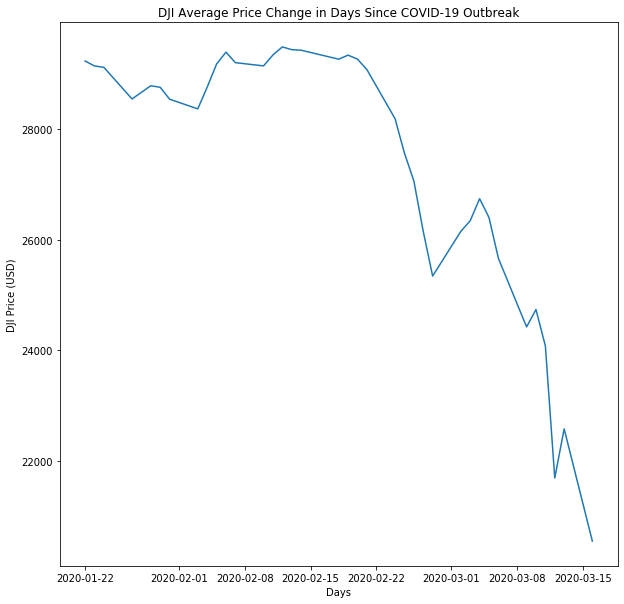

In [12]:
# Visualize results for ^DJI dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_US_DJI["Date"], result_US_DJI["^DJI Average"])
plt.xlabel("Days")
plt.ylabel("DJI Price (USD)")
plt.title("DJI Average Price Change in Days Since COVID-19 Outbreak")
plt.show()

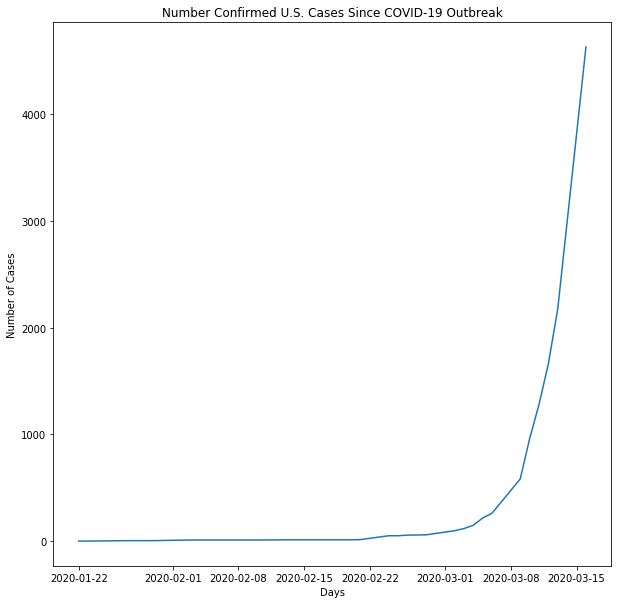

In [13]:
# Visualize results for COVID-19 dataframe

fig = plt.figure(figsize=(10,10))
plt.plot(result_US_DJI["Date"], result_US_DJI["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number Confirmed U.S. Cases Since COVID-19 Outbreak")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average')

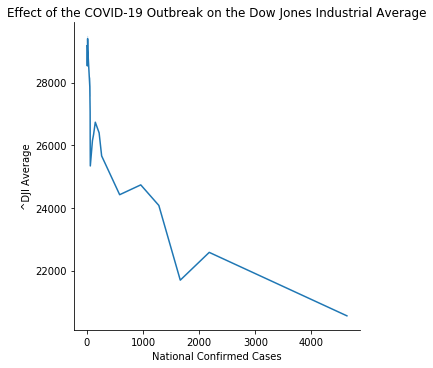

In [14]:
# Visualize relationship between ^DJI and COVID-19 datasets
plot1 = sns.relplot(x="National Confirmed Cases", y="^DJI Average", kind="line", data=result_US_DJI)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average")

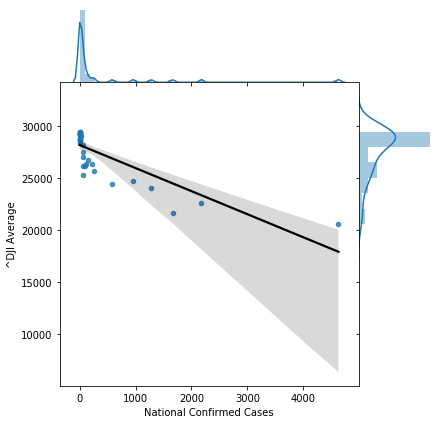

In [15]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='^DJI Average', 
    data=result_US_DJI,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

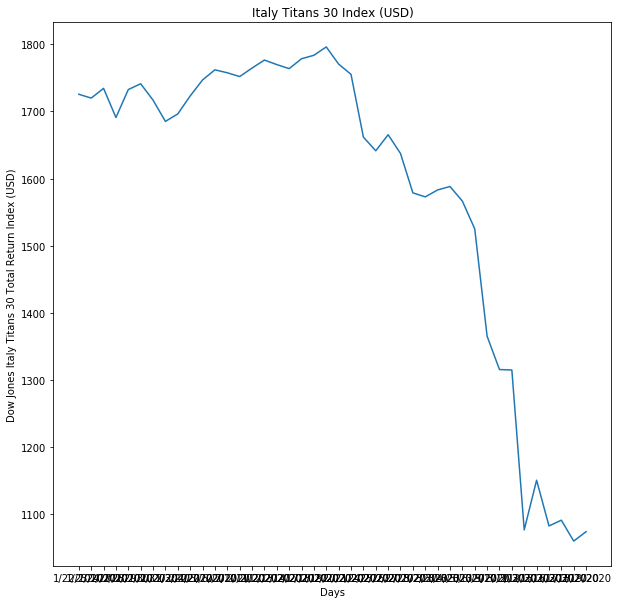

In [16]:
# Visualize results for italy titans 30 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(italy_data["Date"], italy_data["Titans 30 Price (USD)"])
plt.xlabel("Days")
plt.ylabel("Dow Jones Italy Titans 30 Total Return Index (USD)")
plt.title("Italy Titans 30 Index (USD)")
plt.show()

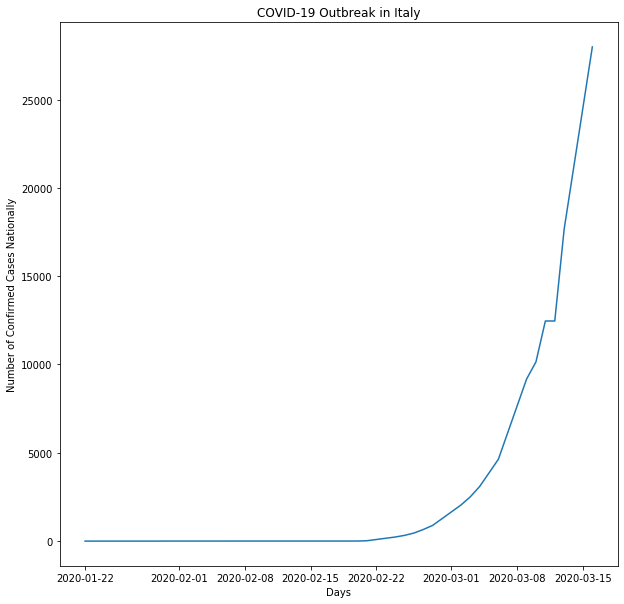

In [17]:
# Visualize results for italy COVID-19 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_IT["Date"], result_IT["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases Nationally")
plt.title("COVID-19 Outbreak in Italy")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average')

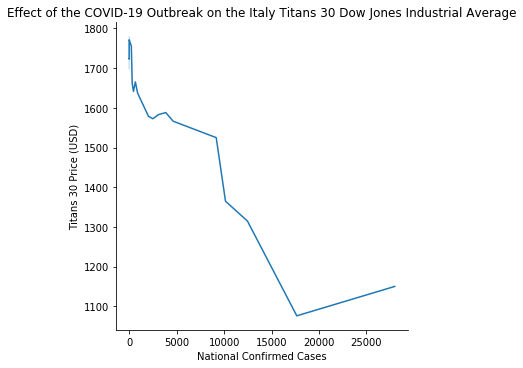

In [18]:
plot1 = sns.relplot(x="National Confirmed Cases", y="Titans 30 Price (USD)", kind="line", data=result_IT)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average")

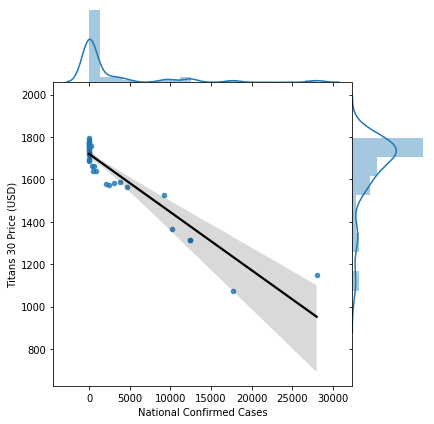

In [19]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='Titans 30 Price (USD)', 
    data=result_IT,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

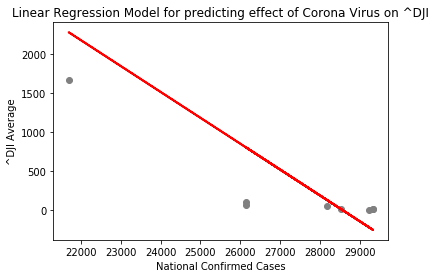

,Actual,Predicted
0,51,123.626737
1,13,-257.564661
2,58,799.232202
3,12,-258.613854
4,98,799.034810
5,5,5.043992
6,1663,2277.418120
7,1,-222.577314


In [20]:
# Next we move to the predictive modeling portion of this project. First let's import our libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will begin by first using a linear regression model (it is obvious that the models do not have strictly linear correlations so we are not doing this for accuracy just out of curiosity)
y_US=result_US_DJI["National Confirmed Cases"].values.reshape(-1,1)
x_US=result_US_DJI["^DJI Average"].values.reshape(-1,1)
x_train_US,x_test_US,y_train_US,y_test_US=train_test_split(x_US,y_US,test_size=0.2)
x_train_US = np.asarray(x_train_US)
x_test_US = np.asarray(x_test_US)
y_train_US = np.asarray(y_train_US)
y_test_US = np.asarray(y_test_US)
regressor = LinearRegression()  
regressor.fit(x_train_US, y_train_US)


y_pred_US = regressor.predict(x_test_US)
plt.scatter(x_test_US, y_test_US,  color='gray')
plt.plot(x_test_US, y_pred_US, color='red', linewidth=2)
plt.title("Linear Regression Model for predicting effect of Corona Virus on ^DJI")
plt.xlabel("National Confirmed Cases")
plt.ylabel("^DJI Average")
plt.show()

# As you can see our results are awful
df = pd.DataFrame({'Actual': y_test_US.flatten(), 'Predicted': y_pred_US.flatten()})
df

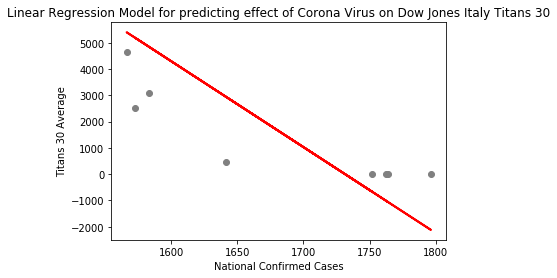

,Actual,Predicted
0,453,2944.862393
1,3,-1060.995809
2,3089,4853.472544
3,2502,5191.843820
4,3,-673.912147
5,4636,5396.828158
6,3,-2119.591161
7,2,-1002.148630


In [21]:
# Let's take a look at how bad they are for Italy
y_IT=result_IT["National Confirmed Cases"].values.reshape(-1,1)
x_IT=result_IT["Titans 30 Price (USD)"].values.reshape(-1,1)
x_train_IT,x_test_IT,y_train_IT,y_test_IT=train_test_split(x_IT,y_IT,test_size=0.2)

regressor = LinearRegression()  
regressor.fit(x_train_IT, y_train_IT)

y_pred_IT = regressor.predict(x_test_IT)
plt.scatter(x_test_IT, y_test_IT,  color='gray')
plt.plot(x_test_IT, y_pred_IT, color='red', linewidth=2)
plt.title("Linear Regression Model for predicting effect of Corona Virus on Dow Jones Italy Titans 30")
plt.xlabel("National Confirmed Cases")
plt.ylabel("Titans 30 Average")
plt.show()

# As you can see our results are again awful
df = pd.DataFrame({'Actual': y_test_IT.flatten(), 'Predicted': y_pred_IT.flatten()})
df


Epoch: 0, loss:1515219.5000,  mae:554.9749,  mse:1515219.5000,  val_loss:101.8038,  val_mae:9.6107,  val_mse:101.8038,  
....................................................................................................
Epoch: 100, loss:1493083.1250,  mae:547.2197,  mse:1493083.1250,  val_loss:21.3553,  val_mae:3.9116,  val_mse:21.3553,  
....................................................................................................
Epoch: 200, loss:1430671.5000,  mae:532.3281,  mse:1430671.5000,  val_loss:233.8009,  val_mae:14.9845,  val_mse:233.8009,  
....................................................................................................
Epoch: 300, loss:1308242.0000,  mae:509.2958,  mse:1308242.0000,  val_loss:2335.3423,  val_mae:48.2359,  val_mse:2335.3423,  
....................................................................................................
Epoch: 400, loss:1115655.0000,  mae:484.7689,  mse:1115655.0000,  val_loss:9935.2939,  val_mae:99.6380,

....................................................................................................
Epoch: 3900, loss:4.5579,  mae:1.2889,  mse:4.5579,  val_loss:0.2434,  val_mae:0.4926,  val_mse:0.2434,  
....................................................................................................
Epoch: 4000, loss:4.6044,  mae:1.2977,  mse:4.6044,  val_loss:0.2537,  val_mae:0.5026,  val_mse:0.2537,  
....................................................................................................
Epoch: 4100, loss:4.4977,  mae:1.2803,  mse:4.4977,  val_loss:0.2563,  val_mae:0.5046,  val_mse:0.2563,  
....................................................................................................
Epoch: 4200, loss:4.5810,  mae:1.3009,  mse:4.5810,  val_loss:0.2766,  val_mae:0.5238,  val_mse:0.2766,  
....................................................................................................
Epoch: 4300, loss:4.4899,  mae:1.2830,  mse:4.4899,  val_loss:0.2479,  

....................................................................................................
Epoch: 7900, loss:4.5603,  mae:1.2877,  mse:4.5603,  val_loss:0.2790,  val_mae:0.5211,  val_mse:0.2790,  
....................................................................................................
Epoch: 8000, loss:4.6346,  mae:1.2973,  mse:4.6346,  val_loss:0.2946,  val_mae:0.5351,  val_mse:0.2946,  
....................................................................................................
Epoch: 8100, loss:4.6615,  mae:1.3095,  mse:4.6615,  val_loss:0.3028,  val_mae:0.5422,  val_mse:0.3028,  
....................................................................................................
Epoch: 8200, loss:4.6671,  mae:1.3099,  mse:4.6671,  val_loss:0.3077,  val_mae:0.5459,  val_mse:0.3077,  
....................................................................................................
Epoch: 8300, loss:4.5681,  mae:1.2969,  mse:4.5681,  val_loss:0.3083,  

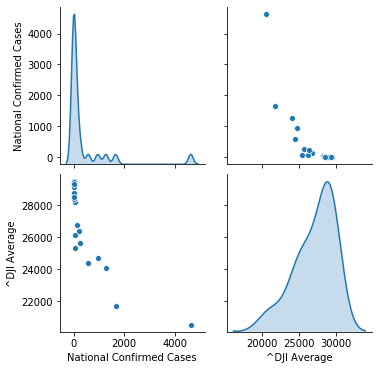

In [22]:
# Let's now try using tensorflow to model our data and make predictions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

train_dataset = result_US_DJI.drop(columns = "Date").sample(frac=0.6,random_state=0)
test_dataset = result_US_DJI.drop(columns= "Date").drop(train_dataset.index)

sns.pairplot(train_dataset[["National Confirmed Cases", "^DJI Average"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop("^DJI Average")
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('^DJI Average')
test_labels = test_dataset.pop('^DJI Average')
train_labels = np.asarray(train_dataset)
test_labels = np.asarray(test_dataset)

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data = np.asarray(normed_train_data)
normed_test_data = np.asarray(normed_test_data)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
# model.summary()


example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

EPOCHS = 10000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,4.560777,1.289373,4.560777,0.145522,0.367420,0.145522,9995
9996,4.524278,1.280711,4.524278,0.315805,0.548079,0.315805,9996
9997,4.541735,1.287428,4.541735,0.143571,0.364568,0.143571,9997
9998,4.610056,1.299501,4.610056,0.329442,0.560183,0.329442,9998
9999,4.606548,1.291470,4.606548,0.141909,0.362186,0.141909,9999


Text(0, 0.5, '^DJI')

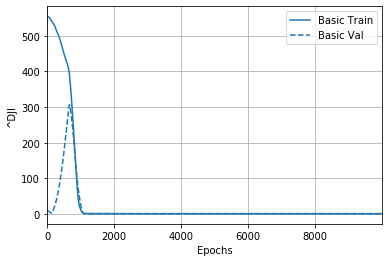

In [24]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('^DJI')

Text(0, 0.5, 'MSE ^DJI')

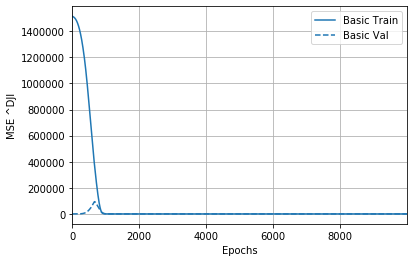

In [25]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE ^DJI')


Epoch: 0, loss:1514853.1250,  mae:554.8347,  mse:1514853.1250,  val_loss:99.3604,  val_mae:9.4824,  val_mse:99.3604,  
....................................................................................................
Epoch: 100, loss:1484651.7500,  mae:544.3315,  mse:1484651.7500,  val_loss:10.9953,  val_mae:3.1324,  val_mse:10.9953,  
...................

Text(0, 0.5, 'MAE ^DJI')

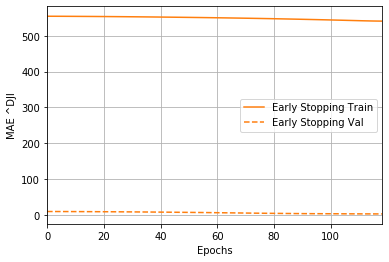

In [26]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylabel('MAE ^DJI')

In [27]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

15/1 - 0s - loss: 309303.0312 - mae: 164.9682 - mse: 309303.0312
Testing set Mean Abs Error: 164.97 Price


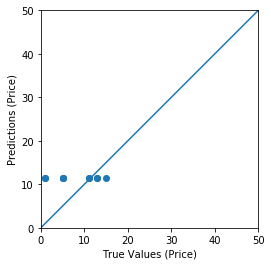

In [28]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price)')
plt.ylabel('Predictions (Price)')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

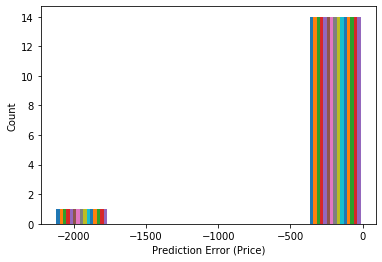

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 5)
plt.xlabel("Prediction Error (Price)")
_ = plt.ylabel("Count")

In [30]:
test_predictions

array([11.36398 , 11.36398 , 11.358016, 11.358016, 11.358016, 11.349059,
       11.349059, 11.346281, 11.346281, 11.344001, 11.327929, 11.33635 ,
       11.436137, 11.490065, 30.350853], dtype=float32)

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from patsy import dmatrix

df = result_US_DJI
# result_US_DJI
vars = ['National Confirmed Cases', '^DJI Average']
df = df[vars]
df = df.dropna()
y, X = dmatrix('National Confirmed Cases ~ ^DJI Average', data=df, return_type='dataframe')

AssertionError: 